# 07c - NEB for CH-OH bond scission on Rh(111)

This notebook reproduces Fig. 7c from the manuscript and Fig. S33 from the Supporting Information. The data in this notebook visualizes the energies of three different NEB trajectories for the bond scission.

In [1]:
from basics import *
from plotting import *

from ase import Atoms
from ase.io import read

plt.style.use("paper")

## All images in the NEB

In [2]:
path = "../data/07-Rh111-neb"

nebs = {
    n: read(f"{path}/neb-{n}.traj", index=":")
    for n in [1, 2, 3]
}

energies = {
    n: np.array([x.get_potential_energy() for x in traj])
    for n, traj in nebs.items()
}

ch_idx = (4, 12)

In [3]:
colors = {
    1: "#ED1C24",
    2: "#00AEEF",
    3: "#2E3192",
}

In [4]:
distances = {
    n: np.array([
        at.get_distance(ch_idx[0], ch_idx[1], mic=True)
        for at in neb
    ])
    for n, neb in nebs.items()
}

In [5]:
emin = min([se for e in energies.values() for se in e])

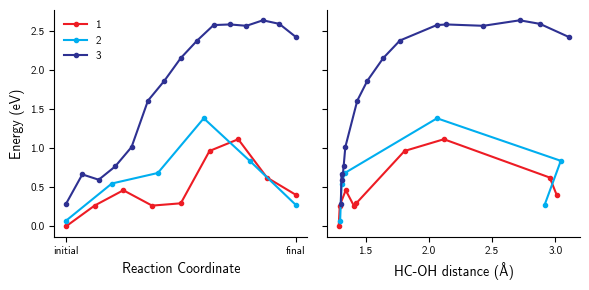

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

for i, traj in energies.items():
    x = np.linspace(0, 1, len(traj))
    axs[0].plot(x, traj - emin, "o-", label=i, color=colors[i], markersize=3)
    
    d = distances[i]
    axs[1].plot(d, traj - emin, "o-", label=i, color=colors[i], markersize=3)
    
axs[0].set_ylabel("Energy (eV)")
axs[0].set_xlabel("Reaction Coordinate")
axs[1].set_xlabel("HC-OH distance (Å)")

axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["initial", "final"])

axs[0].legend(frameon=False)
fig.tight_layout()
savefig(fig, "07-Rh111-barriers.pdf")
plt.show()

## Simplified NEB trajectory for main paper

In [7]:
indices = {
    1: [0, 2, 3, 6, 8],
    2: [0, 1, 2, 3, 5],
    3: [0, 1, 2, 9, 14],
}

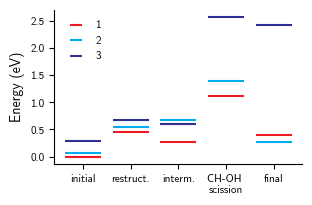

In [8]:
fig, ax = plt.subplots(figsize=(3.2, 2))

x = np.linspace(0, 1, 5)

for i, traj in energies.items():
    traj = traj[indices[i]]
    ax.scatter(x, traj - emin, s=700, label=i, color=colors[i], marker="_")
    
ax.set_ylabel("Energy (eV)")
ax.set_xlabel("")
ax.set_xticks(x)
ax.set_xticklabels([
    "initial",
    "restruct.",
    "interm.",
    "CH-OH \nscission",
    "final"
])
# ax.set_ylim(0)
ax.set_xlim(-0.15, 1.15)

ax.legend(frameon=False, markerscale=0.3)
savefig(fig, "07-Rh111-neb.pdf")
plt.show()

In [9]:
cols = [
    "initial",
    "restruct.",
    "interm.",
    "CH-OH scission",
    "final"
]
table = []

for i, traj in energies.items():
    traj = traj[indices[i]]
    table.append(traj - emin)
    
table = pd.DataFrame(table, columns=cols, index=[1, 2, 3])

In [10]:
print(table.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
 & initial & restruct. & interm. & CH-OH scission & final \\
\midrule
1 & 0.00 & 0.46 & 0.27 & 1.12 & 0.41 \\
2 & 0.07 & 0.55 & 0.68 & 1.38 & 0.28 \\
3 & 0.29 & 0.67 & 0.60 & 2.58 & 2.42 \\
\bottomrule
\end{tabular}

